<a href="https://colab.research.google.com/github/arjangvt/ThinkML/blob/main/deep_learning/autoencoder/AutoEncoderBasic_Ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import neccessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras import layers, models

from keras.models import Sequential

In [2]:
#  Load the MNIST dataset (we ignore the labels since autoencoders are unsupervised)
(x_train, _),(x_test, _) = mnist.load_data()

#  Normalize pixel values to the range [0, 1] and add a channel dimension
x_train = x_train / 255
x_test = x_test / 255

#  Add channel dimension to make it (batch_size, 28, 28, 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#  Define the encoder model
encoder = Sequential([
    layers.Input(shape=(28,28, 1)),
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), padding="same"),
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2,2), padding="same")
])

In [4]:
#  Define the decoder model
decoder = Sequential([
     # Start with the encoded representation of shape (7, 7, 16)
    layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu", input_shape=(7,7,16)  ),
    layers.UpSampling2D(size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),
    layers.UpSampling2D(size=(2,2)),
    layers.Conv2D(filters=1, kernel_size=(3,3), padding="same", activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
#  Combine encoder and decoder to form the autoencoder
model = Sequential([encoder, decoder])

In [6]:
#  Compile the model using binary crossentropy (good for normalized images)
model.compile(optimizer="adam", loss='binary_crossentropy')

#  Train the autoencoder to reconstruct its input
model.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 200ms/step - loss: 0.2305 - val_loss: 0.0806
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 195ms/step - loss: 0.0796 - val_loss: 0.0748
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 190ms/step - loss: 0.0749 - val_loss: 0.0724
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 196ms/step - loss: 0.0728 - val_loss: 0.0717
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 189ms/step - loss: 0.0716 - val_loss: 0.0701
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 191ms/step - loss: 0.0706 - val_loss: 0.0696
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 191ms/step - loss: 0.0700 - val_loss: 0.0690
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 194ms/step - loss: 0.0695 - val_loss: 0.0686
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 189ms/step - loss: 0.0691 - val_loss: 0.0683
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 190ms/step - loss: 0.0687 - val_loss: 0.0680


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


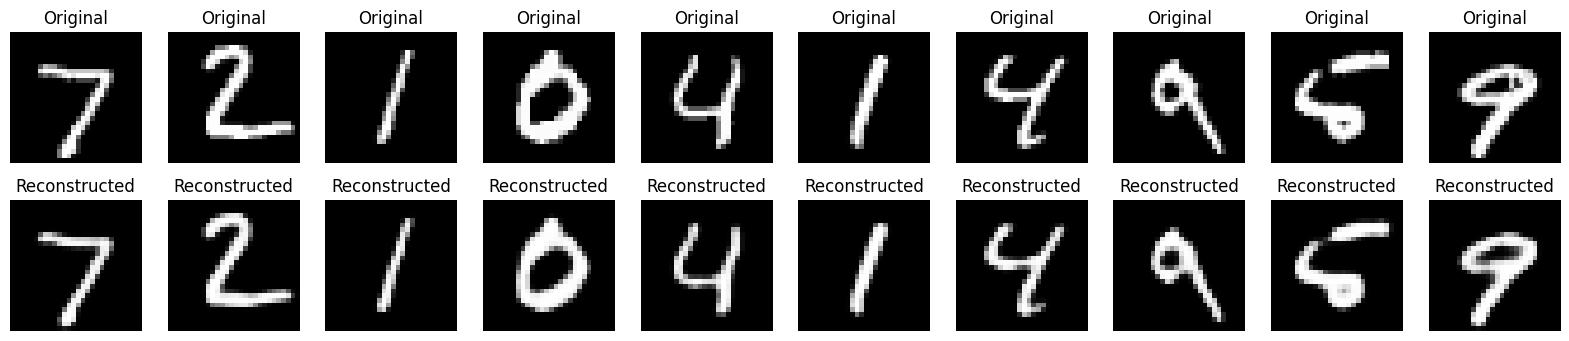

In [10]:
#  Generate reconstructed images from test data
decoded_imgs = model.predict(x_test)

#  Visualize original and reconstructed digits side by side
n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()